In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Wine EDA

In [3]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)

df = pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [5]:
df["wine_class"].value_counts()

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

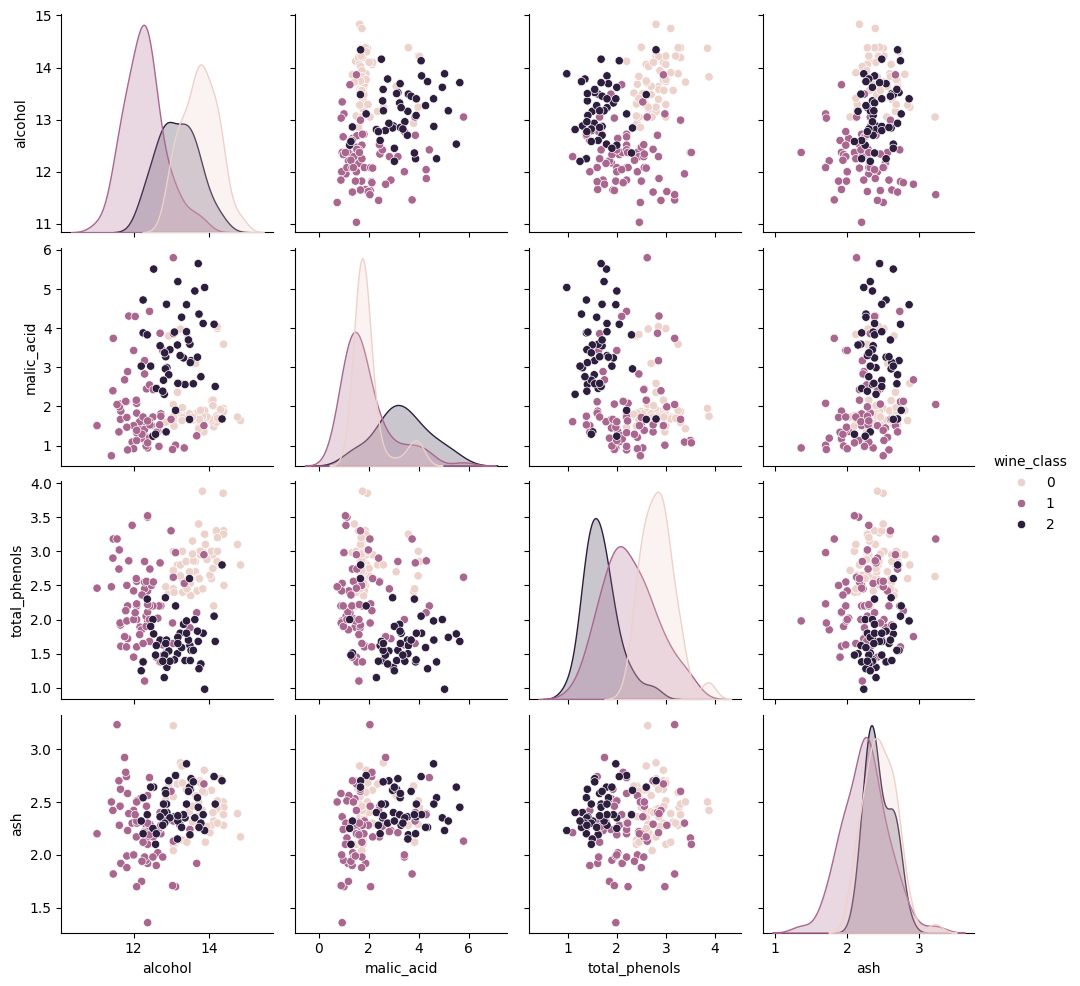

In [6]:
sns.pairplot(data=df[["alcohol","malic_acid","total_phenols","ash","wine_class"]], hue="wine_class")

<Axes: >

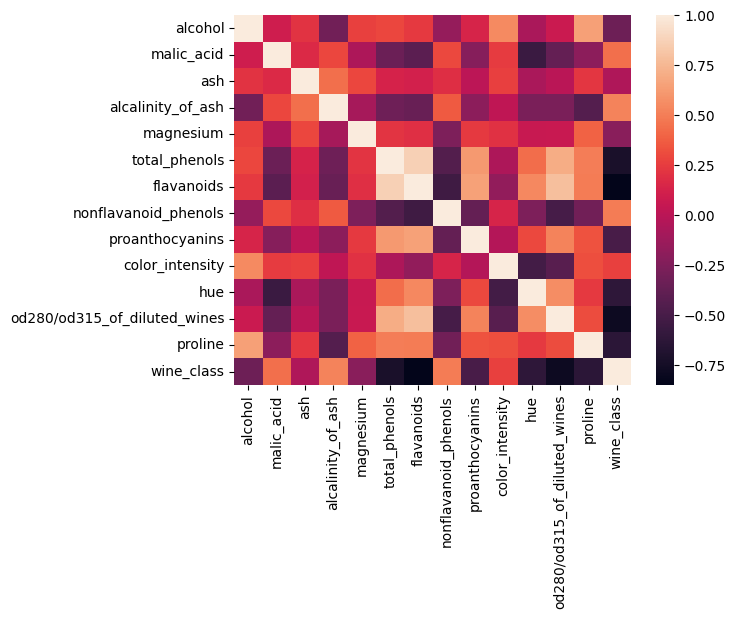

In [7]:
sns.heatmap(df.corr(), annot=False)

knn or knearest is a suoervised machine learning algo that can be used for both regression of classification it calculates the distance between a test dataa point and all traiding data, find training points tnrearest to the test data, then it does majority voting to classify that test point to majority of the class of the training data points that re closest, for regression instead it takes an average of those k-points that are closest

in knn it is a necessity to do feature scaling as the distance calculated using a distance metric can be very wrong if the features are in different scales



In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X,y = df.drop("wine_class",axis="columns"), df["wine_class"]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors=1)

model_knn.fit(scaled_X_train,y_train)
y_pred = model_knn.predict(scaled_X_test)

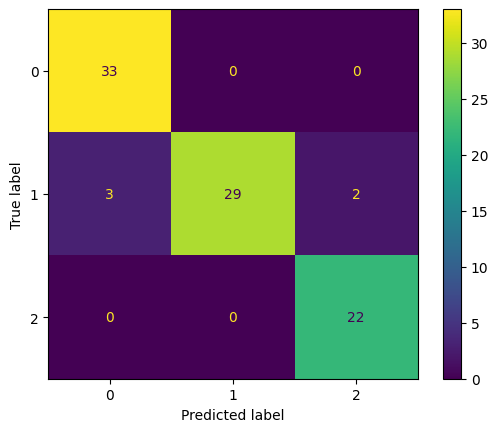

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



# Pipeline and GridsearchCV


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)


scaler = StandardScaler()

pipe_log = Pipeline([("scaler",scaler),("log", LogisticRegression(
    solver="saga", max_iter=5,penalty="elasticnet"))])

# pipe_KNN = Pipeline([("scaler", scaler),("knn", KNeighborsClassifier())])

# param_grid_KNN = {"knn__n_neighbors": list(range(1,50))}

l1_ratio = np.linspace(0,1,20)
param_grid_log = {"log__l1_ratio": l1_ratio}

# classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN,cv=5, scoring="accuracy")

classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring="accuracy")

# classifier_KNN.fit(X_train,y_train)
classifier_log.fit(X_train,y_train)

/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=5,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [ ]:
# classifier_KNN.best_estimator_.get_params()
classifier_log.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=np.float64(0.3157894736842105), max_iter=1000,
                      penalty='elasticnet', solver='saga'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=np.float64(0.3157894736842105), max_iter=1000,
                    penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': np.float64(0.3157894736842105),
 'log__max_iter': 1000,
 'log__multi_class': 'deprecated',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



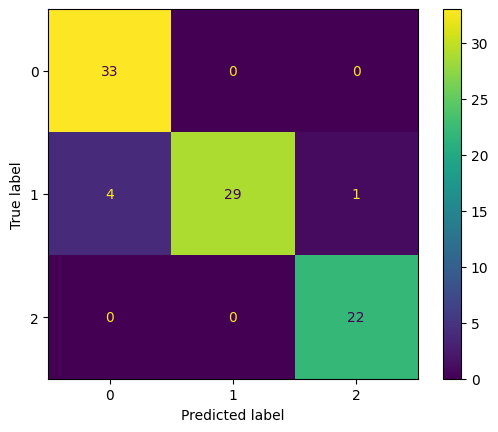

In [ ]:
# y_pred = classifier_KNN.predict(X_test)
# print(classification_report(y_test,y_pred))
# cm = confusion_matrix(y_test,y_pred)
# ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



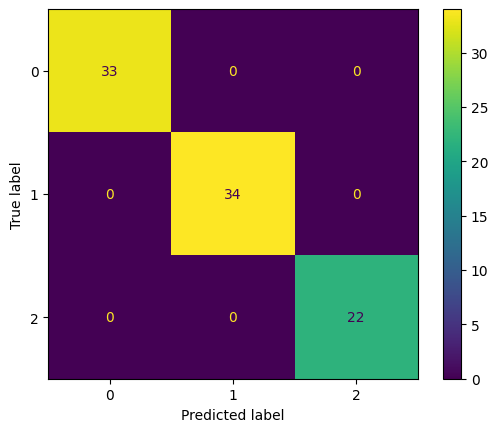

In [ ]:
y_pred = classifier_log.predict(X_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()